In [1]:
#%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

data = pd.read_csv("train.csv")


In [3]:
data.describe()

,acoustic_data,time_to_failure
count,6.291455e+08,6.291455e+08
mean,4.519468e+00,5.678292e+00
std,1.073571e+01,3.672697e+00
min,-5.515000e+03,9.550396e-05
25%,2.000000e+00,2.625997e+00
50%,5.000000e+00,5.349798e+00
75%,7.000000e+00,8.173396e+00
max,5.444000e+03,1.610740e+01


In [4]:

rand_sample = data.sample(n=1000)

In [5]:
rand_sample.describe()

,acoustic_data,time_to_failure
count,1000.000000,1000.000000
mean,4.460000,5.583329
std,5.359769,3.693316
min,-62.000000,0.010899
25%,2.000000,2.616874
50%,5.000000,5.116548
75%,7.000000,8.082321
max,52.000000,15.756298


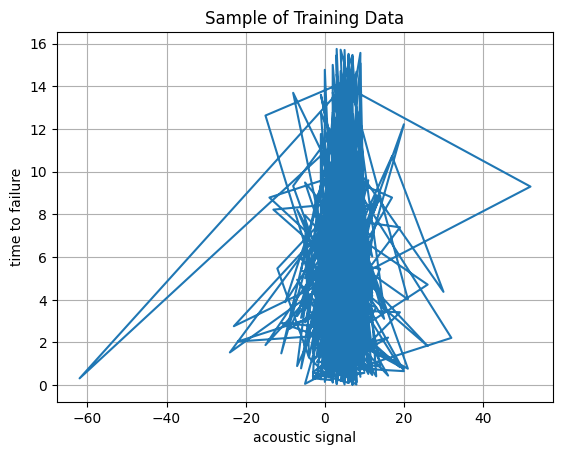

In [7]:

plt.plot(rand_sample['acoustic_data'], rand_sample['time_to_failure'])
plt.title('Sample of Training Data')
plt.xlabel('acoustic signal')
plt.ylabel('time to failure')
plt.grid(True)
plt.show()

In [ ]:
# Plotting the DataFrame
plt.scatter(rand_sample['acoustic_data'], rand_sample['time_to_failure'])
plt.title('Sample of Training Data')
plt.xlabel('acoustic signal')
plt.ylabel('time to failure')
plt.grid(True)
plt.show()